In [8]:
import pandas as pd
import xml.etree.ElementTree as ET  # For parsing the XML files
from xml.dom import minidom  # For prettifying the XML files
import os
import shutil

paths = []
for dirname, _, filenames in os.walk(r"C:\Users\prane\data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

# Split all paths by extension
xmls = []
jpgs = []
for path in paths:
    if path.split('.')[-1] == "xml":
        xmls.append(path)
    if path.split('.')[-1] == "jpg":
        jpgs.append(path)
        
print(f"{len(xmls)} XMLs + {len(jpgs)} JPGs = {len(paths)} paths")


390 XMLs + 481 JPGs = 877 paths


In [26]:
# Create a dictionary for the data so that we can make it a pd.DataFrame
data = {
    "Number": [],
    "Age": [],
    "Sex": [],
    "Composition": [],
    "Echogenicity": [],
    "Margins": [],
    "Calcifications": [],
    "Tirads": [],
    "Reportbacaf": [],
    "Reporteco": [],
}
svg_strings = {}  # To hold the SVG of each image of every case

# Parse every xml file and add the data to the dictionary
for xml in xmls:
    tree = ET.parse(xml)
    root = tree.getroot()
    case_number = int(root.find("number").text)
    data["Number"].append(case_number)
    if root.find("age").text:
        data["Age"].append(int(root.find("age").text))
    else:
        data["Age"].append(root.find("age").text)
    data["Sex"].append(root.find("sex").text)
    data["Composition"].append(root.find("composition").text)
    data["Echogenicity"].append(root.find("echogenicity").text)
    data["Margins"].append(root.find("margins").text)
    data["Calcifications"].append(root.find("calcifications").text)
    data["Tirads"].append(root.find("tirads").text)
    data["Reportbacaf"].append(root.find("reportbacaf").text)
    data["Reporteco"].append(root.find("reporteco").text)
    
    # Get SVGs. Key: <{case number}_{image index}> which is the same as the respective image filename
    for mark in root.findall("mark"):
        image_idx = mark.find("image").text
        svg_strings[f"{case_number}_{image_idx}"] = mark.find("svg").text

df = pd.DataFrame(data)
df.sort_values(by="Number", inplace=True)
df.set_index("Number", inplace=True)
df

,Age,Sex,Composition,Echogenicity,Margins,Calcifications,Tirads,Reportbacaf,Reporteco
Number,,,,,,,,,
1,NaN,None,None,None,None,None,None,None,None
2,49.0,F,solid,hyperechogenicity,well defined,non,2,None,None
3,31.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
4,37.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
5,47.0,F,solid,hypoechogenicity,ill defined,microcalcifications,5,None,None
...,...,...,...,...,...,...,...,...,...
396,NaN,None,None,None,None,None,None,None,None
397,39.0,F,None,None,well defined smooth,non,2,None,THYROIDITIS
398,70.0,F,None,None,spiculated,non,4b,None,None


In [10]:
from PIL import Image, ImageDraw

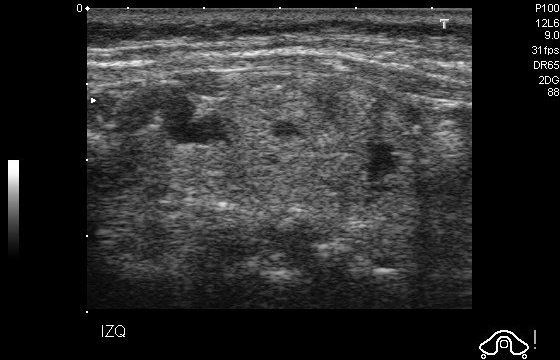

In [28]:
Image.open(jpgs[23])

In [12]:
unique_dims = []
for jpg in jpgs:
    dims = Image.open(jpg).size
    if dims not in unique_dims:
        unique_dims.append(dims)

print(unique_dims)

[(560, 360)]


In [13]:
image_size = unique_dims[0]

# Show the first key and value of the svg dictionary we created
list(svg_strings.items())[0]

('1_1',
 '[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y": 51}, {"x": 146, "y": 69}, {"x": 137, "y": 80}, {"x": 133, "y": 89}, {"x": 136, "y": 236}, {"x": 142, "y": 244}, {"x": 149, "y": 251}, {"x": 161, "y": 261}, {"x": 210, "y": 271}, {"x": 217, "y": 274}, {"x": 223, "y": 279}, {"x": 228, "y": 2

In [14]:
list(svg_strings.items())

[('1_1',
  '[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y": 51}, {"x": 146, "y": 69}, {"x": 137, "y": 80}, {"x": 133, "y": 89}, {"x": 136, "y": 236}, {"x": 142, "y": 244}, {"x": 149, "y": 251}, {"x": 161, "y": 261}, {"x": 210, "y": 271}, {"x": 217, "y": 274}, {"x": 223, "y": 279}, {"x": 228, "y":

In [20]:
# Directories
input_directory = r'C:\Users\prane\data'  # Directory where your original images are stored
mask_directory = r"C:\Users\prane\data\masks"    # Directory where you want to save the mask images
output_directory = r"C:\Users\prane\data\images" # Directory where you want to save the copied images

no_mask = 0  # to count how many SVGs are empty
with_syntax_error = 0  # to count how many XMLs are not complete

for svg_name, svg_str in svg_strings.items():
    img = Image.new("1", image_size)
    draw = ImageDraw.Draw(img)
    
    if svg_str is None:
        no_mask += 1
        continue
    try:
        svg_content = eval(svg_str)
    except SyntaxError:
        with_syntax_error += 1
        continue
    
    for area in svg_content:
        points = [(point["x"], point["y"]) for point in area["points"]]
        draw.polygon(points, fill='white')

    # Save mask image
    mask_path = os.path.join(mask_directory, f"{svg_name}.jpg")
    img.save(mask_path)

    # Copy original image to output directory
    original_image_path = os.path.join(input_directory, f"{svg_name}.jpg")
    output_image_path = os.path.join(output_directory, f"{svg_name}.jpg")
    shutil.copyfile(original_image_path, output_image_path)

print(f"Number of SVGs with no mask: {no_mask}")
print(f"Number of SVGs with syntax errors: {with_syntax_error}")


Number of SVGs with no mask: 6
Number of SVGs with syntax errors: 8


In [23]:
import os
import numpy as np
import cv2
from PIL import Image

image_dir = r"C:\Users\prane\data\images"   
mask_dir = r"C:\Users\prane\data\masks"  
output_dir = r"C:\Users\prane\data\segmented"   


def apply_mask(image_path, mask_path, output_path):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    cv2.imwrite(output_path, segmented_image)

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename)  
        output_path = os.path.join(output_dir, filename)
        apply_mask(image_path, mask_path, output_path)

Image segmentation completed and saved in the output directory.
